# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The aim of this project is to find a safe and secure location for opening of commercial establishments in Vancouver, Canada. Specifically, this report will be targeted to stakeholders interested in opening any business place like **Barbershop** in **Vancouver City**, Canada.

The first task would be to **choose the safest borough** by analysing crime data for opening a grocery store and **short listing a neighbourhood**, where grocery stores are not amongst the most common venues, and yet **as close to the city as possible**.

We will make use of our data science tools to analyse data and focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood where grocery store is not amongst the most common venue can be selected.

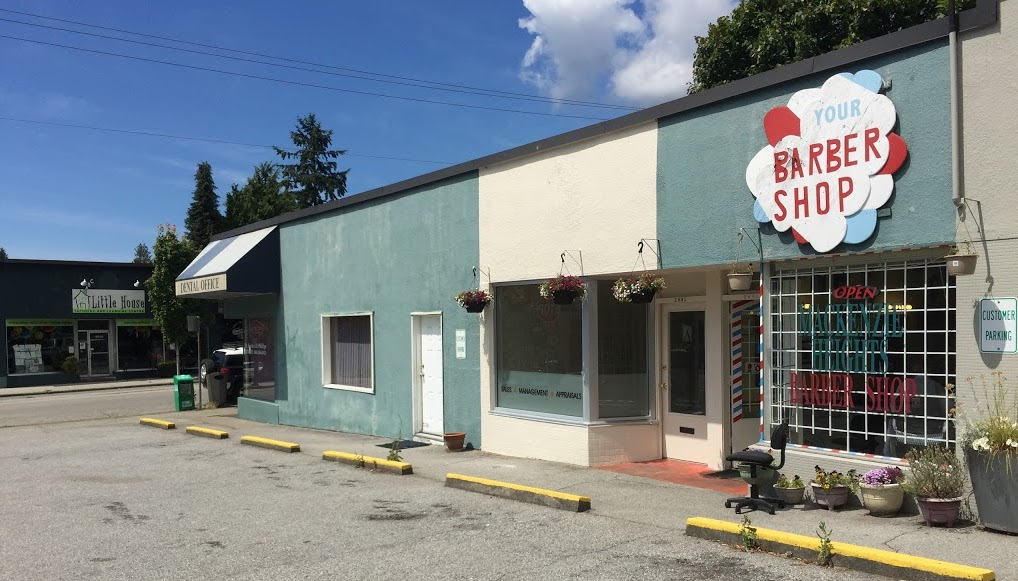

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* finding the safest borough based on crime statistics
* finding the most common venues
* choosing the right neighbourhood within the borough

We will be using the geographical coordinates of Vancouver to plot neighbourhoods in a borough that is safe and in the city's vicinity, and finally cluster our neighborhoods and present our findings.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Using a real world data set from Kaggle containing the Vancouver Crimes from 2003 to 2019](#part1):  A dataset consisting of the crime statistics of each neighbourhood in Vancouver along with type of crime, recorded year, month and hour.

- [**Part 2**: Gathering additional information of the list of officially categorized boroughs in Vancouver from Wikipedia.](#part2): Borough information will be used to map the existing data where each neighbourhood can be assigned with the right borough.

- [**Part 3**: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.](#part3): This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

- [**Part 4**: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.](#part4): This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

### **Part 1:** Using a real world data set from Kaggle containing the Vancouver Crimes from 2003 to 2019<a name="part1"></a>


####  Vancouver Crime Report 

Properties of the Crime Report

*   TYPE - Crime type
*   YEAR - Recorded year
*   MONTH - Recorded month
*   DAY - Recorded day
*   HOUR - Recorded hour
*   MINUTE - Recorded minute
*   HUNDRED_BLOCK - Recorded block
*   NEIGHBOURHOOD - Recorded neighborhood
*   X - GPS longtitude
*   Y - GPS latitude

Data set URL: https://www.kaggle.com/agilesifaka/vancouver-crime-report/version/2

### Importing all the necessary Libraries 
#### and the neccesary dependencies

In [1]:
import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip3 install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.1.1
Libraries imported


### Reading from the Dataset

###### Due to sheer amount of data(~ 600,000 rows), it was not possible to process all of them and instead for this project we will be considering the recent crime report of the 2019.

In [2]:
vnc_crime_df = pd.read_csv('https://raw.githubusercontent.com/yawdap/Coursera-Capstone-Project-/master/vancouver_crime_records_2019.csv', index_col=None)
vnc_crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5457109.822
1,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5459174.338
2,Break and Enter Commercial,2019,6,9,10,58,10XX BEACH AVE,West End,490232.6157,5458203.356
3,Break and Enter Commercial,2019,1,6,1,36,10XX BEACH AVE,West End,490234.4136,5458201.015
4,Break and Enter Commercial,2019,7,21,11,21,10XX BEACH AVE,Central Business District,490249.2307,5458166.833


In [3]:
print(vnc_crime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35872 entries, 0 to 35871
Data columns (total 10 columns):
TYPE             35872 non-null object
YEAR             35872 non-null int64
MONTH            35872 non-null int64
DAY              35872 non-null int64
HOUR             35872 non-null int64
MINUTE           35872 non-null int64
HUNDRED_BLOCK    35872 non-null object
NEIGHBOURHOOD    32717 non-null object
X                35871 non-null float64
Y                35871 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 2.7+ MB
None


In [4]:
#Dropping MINUTE, HUNDRED_BLOCK as well as X,Y which represents Lat, Lng data as Coordinates.
vnc_crime_df.drop(['MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis = 1, inplace = True)

vnc_crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Break and Enter Commercial,2019,3,7,2,Fairview
1,Break and Enter Commercial,2019,8,27,4,West End
2,Break and Enter Commercial,2019,6,9,10,West End
3,Break and Enter Commercial,2019,1,6,1,West End
4,Break and Enter Commercial,2019,7,21,11,Central Business District


In [5]:
#Changing the name of columns to lowercase

vnc_crime_df.columns = ['Type', 'Year','Month','Day','Hour','Neighbourhood']
vnc_crime_df.head()

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2019,3,7,2,Fairview
1,Break and Enter Commercial,2019,8,27,4,West End
2,Break and Enter Commercial,2019,6,9,10,West End
3,Break and Enter Commercial,2019,1,6,1,West End
4,Break and Enter Commercial,2019,7,21,11,Central Business District


#### Total Crimes in different Neighborhoods

In [6]:
vnc_crime_df['Neighbourhood'].value_counts()

Central Business District    10618
West End                      2864
Mount Pleasant                2219
Strathcona                    1928
Fairview                      1827
Grandview-Woodland            1613
Renfrew-Collingwood           1503
Kitsilano                     1426
Kensington-Cedar Cottage      1363
Hastings-Sunrise              1229
Sunset                         893
Riley Park                     828
Marpole                        771
Victoria-Fraserview            530
Killarney                      507
Oakridge                       491
Kerrisdale                     382
South Cambie                   367
Dunbar-Southlands              329
West Point Grey                323
Shaughnessy                    266
Arbutus Ridge                  263
Stanley Park                   167
Musqueam                        10
Name: Neighbourhood, dtype: int64


### **Part 2:** Gathering additional information about the Neighborhood from Wikipedia<a name="part2"></a>

###### As part of data set Borough which the neighborhood was part of was not categorized, so we will create a dictionary of Neighborhood and based on data in the following [Wikipedia page](https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Vancouver).

In [7]:
# define the dataframe columns
column_names = ['Neighbourhood', 'Borough'] 

# instantiate the dataframe
vnc_neigh_bor = pd.DataFrame(columns=column_names)

vnc_neigh_bor['Neighbourhood'] = vnc_crime_df['Neighbourhood'].unique()

neigh_bor_dict = {'Central Business District':'Central', 'West End':'Central', 'Mount Pleasant':'East Side', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(neigh_bor_dict, vnc_neigh_bor['Neighbourhood']):
  vnc_neigh_bor.loc[vnc_neigh_bor.Neighbourhood == row, 'Borough'] = neigh_bor_dict.get(row)

vnc_neigh_bor.dropna(inplace=True)

print("Total Neighbourhood Count",len(vnc_neigh_bor['Neighbourhood']),"Borough Count",len(vnc_neigh_bor['Borough'].unique()))

vnc_neigh_bor.head()

Total Neighbourhood Count 24 Borough Count 4


,Neighbourhood,Borough
0,Fairview,West Side
1,West End,Central
2,Central Business District,Central
3,Grandview-Woodland,East Side
4,Mount Pleasant,East Side


##### Merging the Crime data Table to include Boroughs

In [8]:
vnc_neigboro_crime = pd.merge(vnc_crime_df,vnc_neigh_bor, on='Neighbourhood')

vnc_neigboro_crime.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Borough
0,Break and Enter Commercial,2019,3,7,2,Fairview,West Side
1,Break and Enter Commercial,2019,4,21,16,Fairview,West Side
2,Break and Enter Commercial,2019,10,26,0,Fairview,West Side
3,Break and Enter Commercial,2019,3,27,8,Fairview,West Side
4,Break and Enter Commercial,2019,7,13,1,Fairview,West Side


##### Further Cleaning the data by dropping rows with invalid data

In [9]:
vnc_neigboro_crime.dropna(inplace=True)
vnc_neigboro_crime['Borough'].value_counts()

Central            13649
East Side          11576
West Side           6445
South Vancouver     1047
Name: Borough, dtype: int64


## Methodology<a name="methodology"></a>

Categorized the methodology section into two parts:

- [**Exploratory Data Analysis**:](#eda) Visualise the crime reports in different Vancouver boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.


- [**Modelling**:](#mdl) To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

#### Exploratory Data Analysis<a name="eda"></a>

In [10]:
#Pivoting the table to better understand the data by crimes per borough
vnc_crime_cat = pd.pivot_table(vnc_neigboro_crime,
                               index=['Borough'],
                               columns=['Type'],
                               values=['Year'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                774                               192   
East Side                              749                               881   
South Vancouver                         38                                81   
West Side                              403                               800   
All                                   1964                              1954   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2003        2473               7041              696   
East Side           1966        1492               4707              712   
South Vancouver      178          82                512               33   
West Side            842         819               2559              541   
All                 4989        4866              14819             1982   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      251   
East Side                    651   
South Vancouver               64   
West Side                    234   
All                         1200   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        6       
South Vancouver                                                  2       
West Side                                                        3       
All                                                             12       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        218    13649  
East Side                                                      412    11576  
South Vancouver                                                 57     1047  
West Side                                                      244     6445  
All                                                            931    32717

In [11]:
#Merging the Pivoted Column with other columns
vnc_crime_cat.reset_index(inplace = True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total',
                              'YearBreak and Enter Commercial':'Break and Enter Commercial',
                              'YearBreak and Enter Residential/Other':'Break and Enter Residential/Other',
                              'YearMischief':'Mischief','YearOther Theft':'Other Theft',
                              'YearTheft from Vehicle':'Theft from Vehicle',
                              'YearTheft of Bicycle':'Theft of Bicycle',
                              'YearTheft of Vehicle':'Theft of Vehicle', 
                              'YearVehicle Collision or Pedestrian Struck (with Fatality)':'Vehicle Collision or Pedestrian Struck (with Fatality)',
                              'YearVehicle Collision or Pedestrian Struck (with Injury)':'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)

# To ignore bottom All in Borough
vnc_crime_cat = vnc_crime_cat.head(4)
vnc_crime_cat

,Borough,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,774,192,2003,2473,7041,696,251,1,218,13649
1,East Side,749,881,1966,1492,4707,712,651,6,412,11576
2,South Vancouver,38,81,178,82,512,33,64,2,57,1047
3,West Side,403,800,842,819,2559,541,234,3,244,6445


In [12]:
vnc_crime_cat

,Borough,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,774,192,2003,2473,7041,696,251,1,218,13649
1,East Side,749,881,1966,1492,4707,712,651,6,412,11576
2,South Vancouver,38,81,178,82,512,33,64,2,57,1047
3,West Side,403,800,842,819,2559,541,234,3,244,6445


In [13]:
#Pivoting the table to better understand the data by crimes per neighborhood

vnc_crime_neigh = pd.pivot_table(vnc_neigboro_crime,
                               index=['Neighbourhood'],
                               columns=['Type'],
                               values=['Year'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_neigh

Year  \
Type                      Break and Enter Commercial   
Neighbourhood                                          
Arbutus Ridge                                      8   
Central Business District                        557   
Dunbar-Southlands                                 10   
Fairview                                         169   
Grandview-Woodland                               110   
Hastings-Sunrise                                  38   
Kensington-Cedar Cottage                          59   
Kerrisdale                                        21   
Killarney                                         26   
Kitsilano                                         75   
Marpole                                           56   
Mount Pleasant                                   200   
Musqueam                                           0   
Oakridge                                          25   
Renfrew-Collingwood                               53   
Riley Park                                        36   
Shaughnessy                                       13   
South Cambie                                      17   
Stanley Park                                       9   
Strathcona                                       180   
Sunset                                            73   
Victoria-Fraserview                               12   
West End                                         208   
West Point Grey                                    9   
All                                             1964   

                                                                      \
Type                      Break and Enter Residential/Other Mischief   
Neighbourhood                                                          
Arbutus Ridge                                            58       33   
Central Business District                               131     1579   
Dunbar-Southlands                                        51       47   
Fairview                                                 86      236   
Grandview-Woodland                                      131      317   
Hastings-Sunrise                                        118      206   
Kensington-Cedar Cottage                                116      256   
Kerrisdale                                               99       49   
Killarney                                                37       76   
Kitsilano                                               138      210   
Marpole                                                 103       93   
Mount Pleasant                                          121      286   
Musqueam                                                  1        3   
Oakridge                                                 97       54   
Renfrew-Collingwood                                     120      208   
Riley Park                                              101       93   
Shaughnessy                                              82       29   
South Cambie                                             47       43   
Stanley Park                                              3       21   
Strathcona                                              118      464   
Sunset                                                   56      136   
Victoria-Fraserview                                      43       99   
West End                                                 58      403   
West Point Grey                                          39       48   
All                                                    1954     4989   

                                                                           \
Type                      Other Theft Theft from Vehicle Theft of Bicycle   
Neighbourhood                                                               
Arbutus Ridge                      24                 92               22   
Central Business District        1996               5507              524   
Dunbar-Southlands                  23                150               22   


In [14]:
vnc_crime_neigh.reset_index(inplace = True)
vnc_crime_neigh.columns = vnc_crime_neigh.columns.map(''.join)
vnc_crime_neigh.rename(columns={'YearAll':'Total',
                                'YearBreak and Enter Commercial':'Break and Enter Commercial',
                                'YearBreak and Enter Residential/Other':'Break and Enter Residential/Other',
                                'YearMischief':'Mischief','YearOther Theft':'Other Theft',
                                'YearTheft from Vehicle':'Theft from Vehicle',
                                'YearTheft of Bicycle':'Theft of Bicycle',
                                'YearTheft of Vehicle':'Theft of Vehicle',
                                'YearVehicle Collision or Pedestrian Struck (with Fatality)':'Vehicle Collision or Pedestrian Struck (with Fatality)',
                                'YearVehicle Collision or Pedestrian Struck (with Injury)':'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)

vnc_crime_neigh.head()

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,8,58,33,24,92,22,12,0,14,263
1,Central Business District,557,131,1579,1996,5507,524,158,1,165,10618
2,Dunbar-Southlands,10,51,47,23,150,22,11,0,15,329
3,Fairview,169,86,236,281,763,210,43,0,39,1827
4,Grandview-Woodland,110,131,317,183,608,115,108,1,40,1613


In [15]:
#Understanding the data by crimes per neighborhood as well as borough

vnc_neigboro_crime = pd.pivot_table(vnc_neigboro_crime,
                               index=['Neighbourhood', 'Borough'],
                               columns=['Type'],
                               values=['Year'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)

vnc_neigboro_crime

Year  \
Type                                      Break and Enter Commercial   
Neighbourhood             Borough                                      
Arbutus Ridge             West Side                                8   
Central Business District Central                                557   
Dunbar-Southlands         West Side                               10   
Fairview                  West Side                              169   
Grandview-Woodland        East Side                              110   
Hastings-Sunrise          East Side                               38   
Kensington-Cedar Cottage  East Side                               59   
Kerrisdale                West Side                               21   
Killarney                 South Vancouver                         26   
Kitsilano                 West Side                               75   
Marpole                   West Side                               56   
Mount Pleasant            East Side                              200   
Musqueam                  South Vancouver                          0   
Oakridge                  West Side                               25   
Renfrew-Collingwood       East Side                               53   
Riley Park                East Side                               36   
Shaughnessy               West Side                               13   
South Cambie              West Side                               17   
Stanley Park              Central                                  9   
Strathcona                East Side                              180   
Sunset                    East Side                               73   
Victoria-Fraserview       South Vancouver                         12   
West End                  Central                                208   
West Point Grey           West Side                                9   
All                                                             1964   

                                                                             \
Type                                      Break and Enter Residential/Other   
Neighbourhood             Borough                                             
Arbutus Ridge             West Side                                      58   
Central Business District Central                                       131   
Dunbar-Southlands         West Side                                      51   
Fairview                  West Side                                      86   
Grandview-Woodland        East Side                                     131   
Hastings-Sunrise          East Side                                     118   
Kensington-Cedar Cottage  East Side                                     116   
Kerrisdale                West Side                                      99   
Killarney                 South Vancouver                                37   
Kitsilano                 West Side                                     138   
Marpole                   West Side                                     103   
Mount Pleasant            East Side                                     121   
Musqueam                  South Vancouver                                 1   
Oakridge                  West Side                                      97   
Renfrew-Collingwood       East Side                                     120   
Riley Park                East Side                                     101   
Shaughnessy               West Side                                      82   
South Cambie              West Side                                      47   
Stanley Park              Central                                         3   
Strathcona                East Side                                     118   
Sunset                    East Side                                      56   
Victoria-Fraserview       South Vancouver                                43   
West End                  Central                                       

In [16]:
vnc_neigboro_crime.reset_index(inplace = True)
vnc_neigboro_crime.columns = vnc_neigboro_crime.columns.map(''.join)
vnc_neigboro_crime.rename(columns={'YearAll':'Total',
                                'YearBreak and Enter Commercial':'Break and Enter Commercial',
                                'YearBreak and Enter Residential/Other':'Break and Enter Residential/Other',
                                'YearMischief':'Mischief','YearOther Theft':'Other Theft',
                                'YearTheft from Vehicle':'Theft from Vehicle',
                                'YearTheft of Bicycle':'Theft of Bicycle',
                                'YearTheft of Vehicle':'Theft of Vehicle',
                                'YearVehicle Collision or Pedestrian Struck (with Fatality)':'Vehicle Collision or Pedestrian Struck (with Fatality)',
                                'YearVehicle Collision or Pedestrian Struck (with Injury)':'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)

vnc_neigboro_crime.head()

,Neighbourhood,Borough,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,West Side,8,58,33,24,92,22,12,0,14,263
1,Central Business District,Central,557,131,1579,1996,5507,524,158,1,165,10618
2,Dunbar-Southlands,West Side,10,51,47,23,150,22,11,0,15,329
3,Fairview,West Side,169,86,236,281,763,210,43,0,39,1827
4,Grandview-Woodland,East Side,110,131,317,183,608,115,108,1,40,1613


In [17]:
vnc_neigboro_crime.describe()

,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
count,25.000000,25.00000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,157.120000,156.32000,399.120000,389.280000,1185.52000,158.560000,96.000000,0.960000,74.480000,2617.360000
std,394.360909,376.63485,1005.762452,1013.538501,3034.86002,395.646104,233.482333,2.406242,181.328229,6601.266652
min,0.000000,1.00000,3.000000,0.000000,4.00000,0.000000,1.000000,0.000000,1.000000,10.000000
25%,13.000000,51.00000,48.000000,24.000000,150.00000,22.000000,14.000000,0.000000,19.000000,367.000000
50%,38.000000,97.00000,99.000000,82.000000,345.00000,35.000000,43.000000,0.000000,39.000000,828.000000
75%,110.000000,118.00000,256.000000,183.000000,608.00000,115.000000,89.000000,1.000000,54.000000,1613.000000
max,1964.000000,1954.00000,4989.000000,4866.000000,14819.00000,1982.000000,1200.000000,12.000000,931.000000,32717.000000


## Exploring the data by Visualising
### Sorting the data by crimes per neighborhood



##### Five Neighborhoods with highest crime

In [18]:
vnc_neigboro_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

crime_neigboro_top5 = vnc_neigboro_crime.iloc[1:6]
crime_neigboro_top5

,Neighbourhood,Borough,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,Central,557,131,1579,1996,5507,524,158,1,165,10618
22,West End,Central,208,58,403,472,1428,159,90,0,46,2864
11,Mount Pleasant,East Side,200,121,286,467,769,217,103,0,56,2219
19,Strathcona,East Side,180,118,464,119,789,106,89,1,62,1928
3,Fairview,West Side,169,86,236,281,763,210,43,0,39,1827


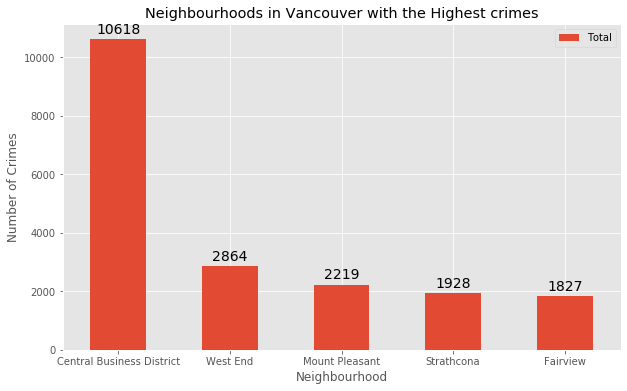

In [19]:
per_neigh = crime_neigboro_top5[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )
plt.show()



###### Five Neighborhoods with lowest crime

In [20]:
crime_neigboro_low = vnc_neigboro_crime.tail(5)
crime_neigboro_low

,Neighbourhood,Borough,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
23,West Point Grey,West Side,9,39,48,14,160,28,14,1,10,323
16,Shaughnessy,West Side,13,82,29,2,100,11,9,0,20,266
0,Arbutus Ridge,West Side,8,58,33,24,92,22,12,0,14,263
18,Stanley Park,Central,9,3,21,5,106,13,3,0,7,167
12,Musqueam,South Vancouver,0,1,3,0,4,0,1,0,1,10


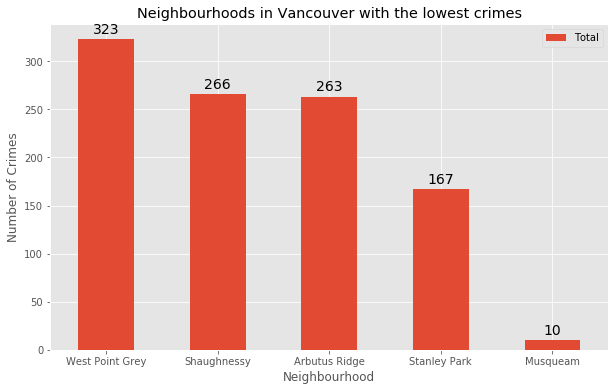

In [21]:
per_neigh = crime_neigboro_low[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()




### Sorting the data by crimes per borough



##### Five Boroughs with highest crime

In [22]:
vnc_crime_cat

,Borough,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,774,192,2003,2473,7041,696,251,1,218,13649
1,East Side,749,881,1966,1492,4707,712,651,6,412,11576
2,South Vancouver,38,81,178,82,512,33,64,2,57,1047
3,West Side,403,800,842,819,2559,541,234,3,244,6445


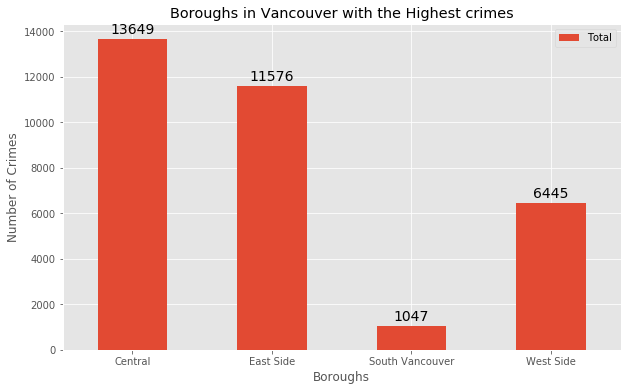

In [23]:
per_neigh = vnc_crime_cat[['Borough','Total']]

per_neigh.set_index('Borough',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Boroughs')
ax.set_title('Boroughs in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )
plt.show()

### Based on exploratory data analysis it is clear that the _South Vancouver_ has the lowest crimes and the Neighbourhood with the lowest crime is _Musqueam_ which is in South Vancouver. 

In [24]:
vnc_neigh_bor["Borough"].value_counts()

West Side          10
East Side           8
Central             3
South Vancouver     3
Name: Borough, dtype: int64

### But since South Vancouver has very little number of neighborhoods and opening a commercial establishment like an Barbershop would not be viable, we can choose the next borough with lowest crime which is **West Side**.





## Now let's focus on the different types of crimes recorded in the West Side Borough

#### West side was chosen because crime type Break and enter Commercial is also low amongst other crimes types which makes West Side ideal destination for opening of commercial establishments

In [25]:
vnc_ws_df = vnc_crime_cat[vnc_crime_cat['Borough'] == 'West Side']
vnc_ws_df

,Borough,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
3,West Side,403,800,842,819,2559,541,234,3,244,6445


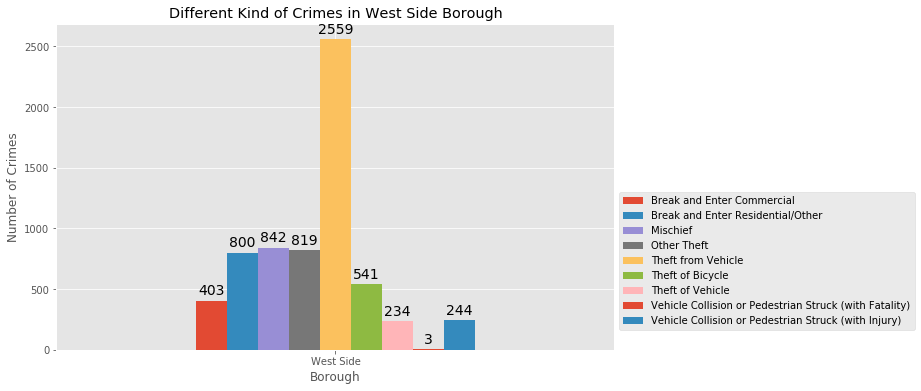

In [26]:
vnc_ws = vnc_ws_df[['Borough','Break and Enter Commercial','Break and Enter Residential/Other','Mischief',
                    'Other Theft','Theft from Vehicle','Theft of Bicycle',
                    'Theft of Vehicle','Vehicle Collision or Pedestrian Struck (with Fatality)',
                    'Vehicle Collision or Pedestrian Struck (with Injury)']]

vnc_ws.set_index('Borough',inplace = True)

ax = vnc_ws.plot(kind='bar', stacked=False, figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Different Kind of Crimes in West Side Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()


### **Part 3**: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates<a name="part3"></a>: 

#### This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

##### Using the West side dataframe as Borough

In [27]:
vnc_ws_neigh = vnc_neigboro_crime

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
vnc_ws_neigh = vnc_ws_neigh[vnc_ws_neigh['Borough'] == 'West Side']
vnc_ws_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in West Side Borough', len(vnc_ws_neigh['Neighbourhood'].unique()))

vnc_ws_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in West Side Borough 10


array(['Fairview', 'Kitsilano', 'Marpole', 'Oakridge', 'Kerrisdale',
       'South Cambie', 'Dunbar-Southlands', 'West Point Grey',
       'Shaughnessy', 'Arbutus Ridge'], dtype=object)


##### Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder

In [29]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = vnc_ws_neigh['Neighbourhood'].unique()


key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('West Side')
print(Latitude, Longitude)

print('The geograpical coordinate of Vancouver City are {}, {}.'.format(Latitude, Longitude))

[49.2641128, 49.2694099, 49.2092233, 49.2308288, 49.2346728, 49.2466847, 49.2534601, 49.2644843, 49.2518626, 49.2409677] [-123.1268352, -123.155267, -123.1361495, -123.1311342, -123.1553893, -123.120915, -123.1850439, -123.1854326, -123.1380226, -123.1670008]
The geograpical coordinate of Vancouver City are [49.2641128, 49.2694099, 49.2092233, 49.2308288, 49.2346728, 49.2466847, 49.2534601, 49.2644843, 49.2518626, 49.2409677], [-123.1268352, -123.155267, -123.1361495, -123.1311342, -123.1553893, -123.120915, -123.1850439, -123.1854326, -123.1380226, -123.1670008].


#### Creating a new Dataframe with Neighborhoods in West Side Borough of Vancoouver along with centroid of their co-ordinates

In [30]:
ws_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ws_neig_geo = pd.DataFrame(data=ws_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

ws_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,Fairview,West Side,49.264113,-123.126835
1,Kitsilano,West Side,49.269410,-123.155267
2,Marpole,West Side,49.209223,-123.136150
3,Oakridge,West Side,49.230829,-123.131134
4,Kerrisdale,West Side,49.234673,-123.155389
5,South Cambie,West Side,49.246685,-123.120915
6,Dunbar-Southlands,West Side,49.253460,-123.185044
7,West Point Grey,West Side,49.264484,-123.185433
8,Shaughnessy,West Side,49.251863,-123.138023
9,Arbutus Ridge,West Side,49.240968,-123.167001


#### Fetching the Geographical co-ordiantes of Vancouver to plot on Map

In [31]:
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


In [32]:
#Using Folium to plot Vancouver City's West Side Borough and it's Neighborhoods

van_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(ws_neig_geo['Latitude'], ws_neig_geo['Longitude'], ws_neig_geo['Borough'], ws_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(van_map)  
    
van_map



### **Part 4**: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.<a name="part4"></a>: 

##### This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### Setting Up Foursquare Credentials

In [33]:
#Four Square Credentials

CLIENT_ID = 'SHPONNNTJKS4XLG2EARW455M5YIY1LP1VWR2DCF42BMLT1X2'
CLIENT_SECRET = 'LRPDZKXTQBR5RUM4BCWNT4NC5Q3MGRB341MH5KWBZ0OUKA3N'
VERSION = '20200621'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SHPONNNTJKS4XLG2EARW455M5YIY1LP1VWR2DCF42BMLT1X2
CLIENT_SECRET:LRPDZKXTQBR5RUM4BCWNT4NC5Q3MGRB341MH5KWBZ0OUKA3N


In [34]:
#Defining a function to fetch top 10 venues around a given neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
#Generating Venues
vnc_ws_venues = getNearbyVenues(names=ws_neig_geo['Neighbourhood'],
                                   latitudes=ws_neig_geo['Latitude'],
                                   longitudes=ws_neig_geo['Longitude']
                                  )

Fairview
Kitsilano
Marpole
Oakridge
Kerrisdale
South Cambie
Dunbar-Southlands
West Point Grey
Shaughnessy
Arbutus Ridge


##### Dataframe containing venues for each neighborhood in West Side

In [36]:
print(vnc_ws_venues.shape)
vnc_ws_venues.head()

(232, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Fairview,49.264113,-123.126835,Gyu-Kaku Japanese BBQ,BBQ Joint
1,Fairview,49.264113,-123.126835,CRESCENT nail and spa,Nail Salon
2,Fairview,49.264113,-123.126835,Finlandia Pharmacy,Pharmacy
3,Fairview,49.264113,-123.126835,Charleson Park,Park
4,Fairview,49.264113,-123.126835,Salmon 'n' Bannock,Restaurant


##### Venue Count per neighborhood

In [37]:
vnc_ws_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Arbutus Ridge,5
Dunbar-Southlands,8
Fairview,26
Kerrisdale,36
Kitsilano,47
Marpole,35
Oakridge,7
Shaughnessy,3
South Cambie,19


In [38]:
print('There are {} uniques categories.'.format(len(vnc_ws_venues['Venue Category'].unique())))

There are 92 uniques categories.



### Modelling<a name="mdl"></a>

##### One Hot Encoding to Analyze Each Neighborhood

In [39]:
#one hot encoding
vnc_onehot = pd.get_dummies(vnc_ws_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
vnc_onehot['Neighbourhood'] = vnc_ws_venues['Neighbourhood'] 

#move neighborhood column to the first column
fixed_columns = [vnc_onehot.columns[-1]] + list(vnc_onehot.columns[:-1])
vnc_onehot = vnc_onehot[fixed_columns]

vnc_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,Boutique,...,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Fairview,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
vnc_onehot.columns.values

array(['Neighbourhood', 'American Restaurant', 'Asian Restaurant',
       'BBQ Joint', 'Bakery', 'Bank', 'Bar', 'Beach', 'Bookstore',
       'Boutique', 'Breakfast Spot', 'Bubble Tea Shop', 'Burger Joint',
       'Bus Station', 'Bus Stop', 'Cafeteria', 'Café', 'Camera Store',
       'Cantonese Restaurant', 'Chinese Restaurant', 'Clothing Store',
       'Coffee Shop', 'Concert Hall', 'Convenience Store',
       'Cosmetics Shop', 'Deli / Bodega', 'Dessert Shop',
       'Dim Sum Restaurant', 'Diner', 'Falafel Restaurant',
       'Fast Food Restaurant', 'Food Truck', 'French Restaurant',
       'Gas Station', 'Gastropub', 'Gift Shop', 'Greek Restaurant',
       'Grocery Store', 'Gym / Fitness Center', 'Gym Pool', 'Hobby Shop',
       'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Korean Restaurant', 'Light Rail Station',
       'Liquor Store', 'Lounge', 'Mac & Cheese Joint', 'Malay Restaurant',
       'Massage Studio', 'Mediterranean Restaurant'

In [41]:
print(vnc_onehot.shape)

(232, 93)


In [42]:
vnc_ws_grouped = vnc_onehot.groupby('Neighbourhood').mean().reset_index()
vnc_ws_grouped

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,Boutique,...,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dunbar-Southlands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fairview,0.000000,0.076923,0.038462,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000
3,Kerrisdale,0.000000,0.027778,0.000000,0.027778,0.027778,0.000000,0.000000,0.000000,0.027778,...,0.055556,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000
4,Kitsilano,0.042553,0.021277,0.000000,0.063830,0.000000,0.000000,0.021277,0.000000,0.000000,...,0.021277,0.021277,0.042553,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.021277
5,Marpole,0.000000,0.000000,0.000000,0.000000,0.028571,0.028571,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.028571,0.000000,0.000000,0.028571,0.057143,0.000000,0.000000,0.000000
6,Oakridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000
7,Shaughnessy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,South Cambie,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000
9,West Point Grey,0.000000,0.021739,0.000000,0.043478,0.021739,0.021739,0.000000,0.043478,0.000000,...,0.000000,0.000000,0.000000,0.021739,0.043478,0.000000,0.000000,0.021739,0.021739,0.021739



#### Top 5 most common venues across neighborhoods

In [43]:
num_top_venues = 5

for hood in vnc_ws_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = vnc_ws_grouped[vnc_ws_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
            venue  freq
0   Grocery Store   0.2
1          Bakery   0.2
2             Spa   0.2
3  Nightlife Spot   0.2
4       Pet Store   0.2


----Dunbar-Southlands----
                venue  freq
0    Sushi Restaurant  0.25
1        Liquor Store  0.12
2         Coffee Shop  0.12
3  Italian Restaurant  0.12
4   Indian Restaurant  0.12


----Fairview----
                venue  freq
0         Coffee Shop  0.15
1                Park  0.08
2    Asian Restaurant  0.08
3  Salon / Barbershop  0.04
4          Restaurant  0.04


----Kerrisdale----
                venue  freq
0         Coffee Shop  0.11
1  Chinese Restaurant  0.08
2            Tea Room  0.06
3      Sandwich Place  0.06
4    Sushi Restaurant  0.06


----Kitsilano----
                 venue  freq
0               Bakery  0.06
1  American Restaurant  0.04
2           Restaurant  0.04
3       Ice Cream Shop  0.04
4  Japanese Restaurant  0.04


----Marpole----
                   venue  freq
0       Sushi Resta

##### Create the new dataframe and displaying the top 10 venues for each neighborhood.

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = vnc_ws_grouped['Neighbourhood']

for ind in np.arange(vnc_ws_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vnc_ws_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Nightlife Spot,Bakery,Pet Store,Grocery Store,Spa,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant
1,Dunbar-Southlands,Sushi Restaurant,Coffee Shop,Liquor Store,Indian Restaurant,Ice Cream Shop,Sporting Goods Shop,Italian Restaurant,Beach,Bookstore,Dim Sum Restaurant
2,Fairview,Coffee Shop,Asian Restaurant,Park,Malay Restaurant,Sushi Restaurant,Salon / Barbershop,Sandwich Place,Falafel Restaurant,Chinese Restaurant,Nail Salon
3,Kerrisdale,Coffee Shop,Chinese Restaurant,Sandwich Place,Pharmacy,Sushi Restaurant,Tea Room,Liquor Store,Mediterranean Restaurant,Dessert Shop,Japanese Restaurant
4,Kitsilano,Bakery,American Restaurant,Coffee Shop,Restaurant,Japanese Restaurant,Ice Cream Shop,French Restaurant,Sushi Restaurant,Food Truck,Thai Restaurant



### Clustering Neighbourhoods

In [46]:
#set number of clusters
kclusters = 5

vnc_grouped_clustering = vnc_ws_grouped.drop('Neighbourhood', 1)

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vnc_grouped_clustering)

#check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 0, 0, 0, 0, 4, 1, 0, 0], dtype=int32)

In [47]:
#add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = ws_neig_geo

#merge toronto_grouped with Vancouver data to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vancouver_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fairview,West Side,49.264113,-123.126835,0,Coffee Shop,Asian Restaurant,Park,Malay Restaurant,Sushi Restaurant,Salon / Barbershop,Sandwich Place,Falafel Restaurant,Chinese Restaurant,Nail Salon
1,Kitsilano,West Side,49.269410,-123.155267,0,Bakery,American Restaurant,Coffee Shop,Restaurant,Japanese Restaurant,Ice Cream Shop,French Restaurant,Sushi Restaurant,Food Truck,Thai Restaurant
2,Marpole,West Side,49.209223,-123.136150,0,Sushi Restaurant,Bus Stop,Dessert Shop,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Japanese Restaurant,Shanghai Restaurant,Bubble Tea Shop,Dim Sum Restaurant
3,Oakridge,West Side,49.230829,-123.131134,4,Concert Hall,Vietnamese Restaurant,Pharmacy,Sandwich Place,Fast Food Restaurant,Sushi Restaurant,Convenience Store,Food Truck,Cosmetics Shop,Deli / Bodega
4,Kerrisdale,West Side,49.234673,-123.155389,0,Coffee Shop,Chinese Restaurant,Sandwich Place,Pharmacy,Sushi Restaurant,Tea Room,Liquor Store,Mediterranean Restaurant,Dessert Shop,Japanese Restaurant


In [48]:
#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

#set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### Analysis<a name="analysis"></a>

#### Examining the resulting Clusters

#### Cluster 1

In [49]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Side,Coffee Shop,Asian Restaurant,Park,Malay Restaurant,Sushi Restaurant,Salon / Barbershop,Sandwich Place,Falafel Restaurant,Chinese Restaurant,Nail Salon
1,West Side,Bakery,American Restaurant,Coffee Shop,Restaurant,Japanese Restaurant,Ice Cream Shop,French Restaurant,Sushi Restaurant,Food Truck,Thai Restaurant
2,West Side,Sushi Restaurant,Bus Stop,Dessert Shop,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Japanese Restaurant,Shanghai Restaurant,Bubble Tea Shop,Dim Sum Restaurant
4,West Side,Coffee Shop,Chinese Restaurant,Sandwich Place,Pharmacy,Sushi Restaurant,Tea Room,Liquor Store,Mediterranean Restaurant,Dessert Shop,Japanese Restaurant
5,West Side,Coffee Shop,Park,Sushi Restaurant,Malay Restaurant,Grocery Store,Gift Shop,Cantonese Restaurant,Café,Cafeteria,Bus Stop
7,West Side,Coffee Shop,Japanese Restaurant,Café,Sushi Restaurant,Vegetarian / Vegan Restaurant,Bakery,Bus Station,Bookstore,Pub,Sporting Goods Shop


#### Cluster 2

In [50]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,West Side,French Restaurant,Bus Stop,Park,Yoga Studio,Gas Station,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant



#### Cluster 3

In [51]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,West Side,Sushi Restaurant,Coffee Shop,Liquor Store,Indian Restaurant,Ice Cream Shop,Sporting Goods Shop,Italian Restaurant,Beach,Bookstore,Dim Sum Restaurant



#### Cluster 4

In [52]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,West Side,Nightlife Spot,Bakery,Pet Store,Grocery Store,Spa,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant



#### Cluster 5

In [53]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,West Side,Concert Hall,Vietnamese Restaurant,Pharmacy,Sandwich Place,Fast Food Restaurant,Sushi Restaurant,Convenience Store,Food Truck,Cosmetics Shop,Deli / Bodega




## Results and Discussion <a name="results"></a>

The objective of the business problem was to help stakeholders identify one of the safest borough in Vancouver, and an appropriate neighborhood within the borough to set up viable a commercial establishment especially an Barbering Shop. 
This has been achieved by first making use of Vancouver crime data to identify a safe borough with considerable number of neighborhood for any business to be viable. After selecting the borough, it was imperative to choose the right neighborhood where Barbering Shops were not among venues in a close proximity to each other. We achieved this by grouping the neighborhoods into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighborhood.


## Conclusion <a name="conclusion"></a>

I have explored the crime data to understand different types of crimes in all neighborhoods within Vancouver and  categorizing them into the different boroughs. This helped us group the neighborhoods into boroughs and choose the safest borough first. Once we confirmed the borough the number of neighborhoods for consideration also comes down, we further shortlist the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.